In [1]:
#Lendo os dataframes
import pandas as pd
path = 'C:\\Users\\eduar\\Dropbox (CPI)\\EduardoMinsky\\Dados_Mineracao\\Dados Tabulares\\Dados_Relacionados\\'
#Pegando processos apenas do Pará
mun = pd.read_csv(path+'ProcessoMunicipio.csv')
substancia = pd.read_csv(path+'ProcessoSubstancia.csv')
eventos = pd.read_csv(path+'ProcessoEvento.csv')
processos = pd.read_csv(path+'Processo.csv')
pessoa = pd.read_csv(path+'ProcessoPessoa.csv')


## Preparando os DataFrames para as analises de quantos processos foram pedidos( evento 333)


In [2]:
#Criando analises para evento 333
#Pegando para ouro
ouro = substancia.query('Substancia.str.contains("OURO")',engine = 'python')
#Pegando eventos 333,1402,513
eventos333 = eventos.query('IDEvento == 333')
#Filtrando os processos ativos:
prceossos_ativos = processos.query('BTAtivo=="S"')
#Relacionando os processos ativos com o df 333
eventos333_ativos = eventos333[eventos333['DSProcesso'].isin(prceossos_ativos['DSProcesso'])]
#Relacionando Ouro com os processos de evento 333
eventos333_ativos_ouro = eventos333_ativos[eventos333_ativos['DSProcesso'].isin(ouro['DSProcesso'])]
#Transformando o campo de data do evento333 em datetime
eventos333_ativos_ouro['Data'] = pd.to_datetime(eventos333_ativos_ouro.DTEvento).dt.year
#Tirando registros duplicados
eventos333_ativos_ouro.drop_duplicates(subset='DSProcesso' ,keep ='last',inplace=True)


#Pegando os estados para esses processo ativos de ouro
mun_ouro_ativo_333 = mun[mun['DSProcesso'].isin(eventos333_ativos_ouro['DSProcesso'])]
#Agrupando os estados por Regiao (Norte, sul, Sudeste,CentroOeste, Nordeste)
sul =['RS','SC','PR']
sudeste = ['SP','MG','RJ','ES']
centrooeste =['MS','MT','GO','DF']
nordeste = ['BA','PI','MA','CE','RN','PB','PE','AL','SE']
norte = ['AC','RO','AM','RR','PA','TO','AP']
mun_ouro_ativo_333['Regiao'] = ['Sul' if x in sul else 'Sudeste' if x in sudeste else 'Centro_Oeste' if x in centrooeste else 'Nordeste' if x in nordeste else 'Norte' if x in norte else 'SemEstado' for x in mun_ouro_ativo_333['UF']]
#Dando Join com o df eventos333_ativos_ouro para plotar o ano com regiao do brasil
join_333_regiao = eventos333_ativos_ouro.merge(mun_ouro_ativo_333,on='DSProcesso',how='inner')
join_333_regiao.drop_duplicates(subset='DSProcesso' ,keep ='last',inplace=True)

#Temos agora o dataframe eventos333_ativos_ouro que contem informaçoes para os processos de ouro, com evento 333
#E tambem temos esse mesmo dataframe mas separado por UF e regiões do BRasil

join_333_regiao.query('Data >= 2000')

C:\Users\eduar\AppData\Local\Temp\ipykernel_8432\897760977.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eventos333_ativos_ouro['Data'] = pd.to_datetime(eventos333_ativos_ouro.DTEvento).dt.year
C:\Users\eduar\AppData\Local\Temp\ipykernel_8432\897760977.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eventos333_ativos_ouro.drop_duplicates(subset='DSProcesso' ,keep ='last',inplace=True)
C:\Users\eduar\AppData\Local\Temp\ipykernel_8432\897760977.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

,Unnamed: 0_x,DSProcesso,IDEvento,DTEvento,Evento_,Data,Unnamed: 0_y,IDMunicipio,Municipios,UF,Regiao
2,71784,650.000/2003,333,2003-11-04,REQ PLG/REQUERIMENTO LAVRA GARIMPEIRA PROTOCOL...,2003,5910,1503606,ITAITUBA,PA,Norte
4,71808,650.001/2000,333,2000-02-07,REQ PLG/REQUERIMENTO LAVRA GARIMPEIRA PROTOCOL...,2000,5913,1503606,ITAITUBA,PA,Norte
5,71811,650.001/2003,333,2003-11-04,REQ PLG/REQUERIMENTO LAVRA GARIMPEIRA PROTOCOL...,2003,5914,1503606,ITAITUBA,PA,Norte
7,71834,650.002/2003,333,2003-11-04,REQ PLG/REQUERIMENTO LAVRA GARIMPEIRA PROTOCOL...,2003,5918,1503606,ITAITUBA,PA,Norte
9,71853,650.003/2003,333,2003-11-04,REQ PLG/REQUERIMENTO LAVRA GARIMPEIRA PROTOCOL...,2003,5922,1503606,ITAITUBA,PA,Norte
...,...,...,...,...,...,...,...,...,...,...,...
19037,8585212,870.569/2023,333,2023-04-25,REQ PLG/REQUERIMENTO LAVRA GARIMPEIRA PROTOCOL...,2023,882695,2924306,PIATÃ,BA,Nordeste
19039,8617890,826.477/2012,333,2012-06-28,REQ PLG/REQUERIMENTO LAVRA GARIMPEIRA PROTOCOL...,2012,329453,4109708,IBAITI,PR,Sul
19041,8651771,826.587/2011,333,2011-08-19,REQ PLG/REQUERIMENTO LAVRA GARIMPEIRA PROTOCOL...,2011,333008,4126306,SENGÉS,PR,Sul
19043,8758985,830.081/2023,333,2023-01-19,REQ PLG/REQUERIMENTO LAVRA GARIMPEIRA PROTOCOL...,2023,344746,3142304,MOEDA,MG,Sudeste


### Criando o Dataframe de preço de Ouro

In [12]:
import matplotlib
gold = pd.read_csv('C:/Users/eduar/Downloads/Gold_01_01_07-12_31_99.csv')
gold['Date_time'] = pd.to_datetime(gold['Date'])
gold_sort=gold.sort_values(by='Date_time')
gold_sort.info()
a = gold_sort.groupby(gold_sort['Date_time'].dt.year)['Date_time'].max()
gold_lastMonth = gold_sort[gold_sort['Date_time'].isin(a)]
gold_lastMonth['Year'] = gold_lastMonth['Date_time'].dt.year

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6752 entries, 2581 to 4108
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Open       6752 non-null   float64       
 1   Close      6752 non-null   float64       
 2   High       6752 non-null   float64       
 3   Low        6752 non-null   float64       
 4   Volume     0 non-null      float64       
 5   Date       6752 non-null   object        
 6   Date_time  6752 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 422.0+ KB


C:\Users\eduar\AppData\Local\Temp\ipykernel_8432\2487364482.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gold_lastMonth['Year'] = gold_lastMonth['Date_time'].dt.year


Plotando

C:\Users\eduar\AppData\Local\Temp\ipykernel_8432\3673021489.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_regiao_333= join_333_regiao.query('Data >= 2000').query('Regiao == "Centro_Oeste" ').groupby(['Data','Regiao','UF'], as_index=False).sum()


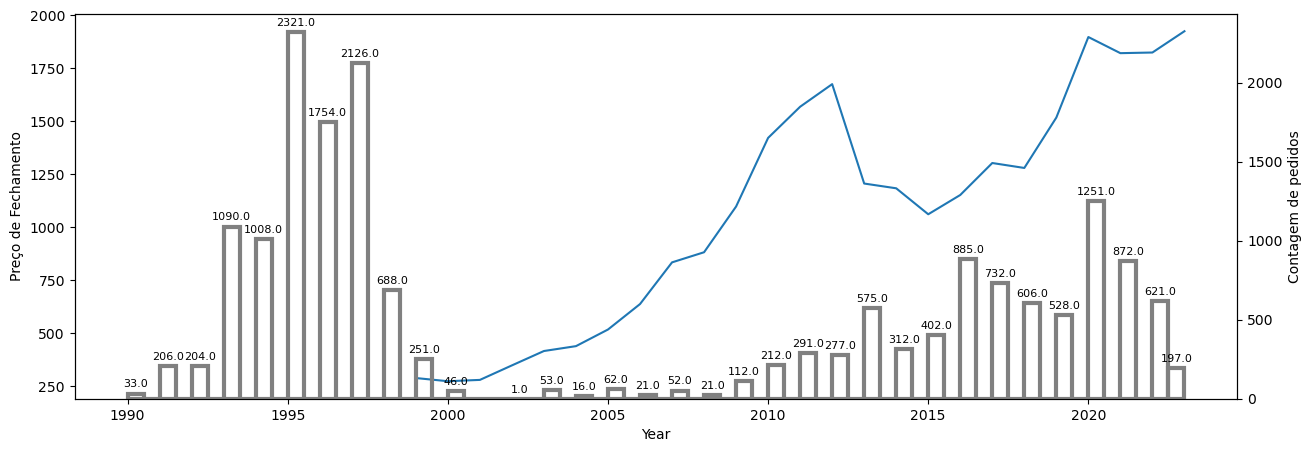

In [14]:
data_regiao_333= join_333_regiao.query('Data >= 2000').query('Regiao == "Centro_Oeste" ').groupby(['Data','Regiao','UF'], as_index=False).sum()

palette_norte = {'MT':'black','GO':'b','MS':'g'}
matplotlib.rc_file_defaults()
ax1 = sns.set_style(style=None, rc=None )


fig, ax1 = plt.subplots(figsize=(15,5))
x = sns.lineplot(gold_lastMonth,x='Year',y = 'Close')


ax2 = ax1.twinx()
y=sns.histplot(join_333_regiao.Data, #Histplot simples
                stat='count', alpha=.4,binwidth=0.5,linewidth=3, edgecolor=".5", facecolor=(0, 0, 0, 0)) # Serve para ver a distribuição geral da quantidade de pedidos por ano

for c in y.containers:
    
    # customize the label to account for cases when there might not be a bar section
    labels = [f'{h:0.1f}' if (h := v.get_height())  else '' for v in c ]
    
    # set the bar label
    y.bar_label(c, labels=labels, fontsize=8, padding=3)




x.set(ylabel='Preço de Fechamento')
y.set(xlabel='Data', ylabel='Contagem de pedidos')
plt.show()

In [ ]:
#Salvando Dataframe da figura 1 do relatorio:
join_333_regiao.groupby('Data',as_index=False).Data.value_counts().to_csv('Figura1.csv')



## Fazendo Plots desses Dois dataframes (Evento 333)

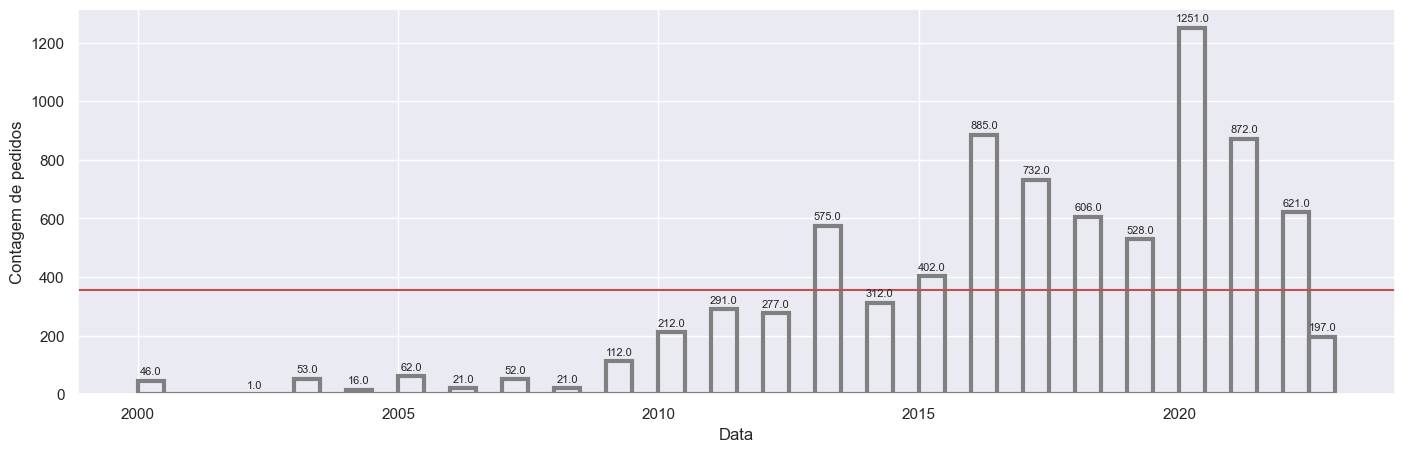

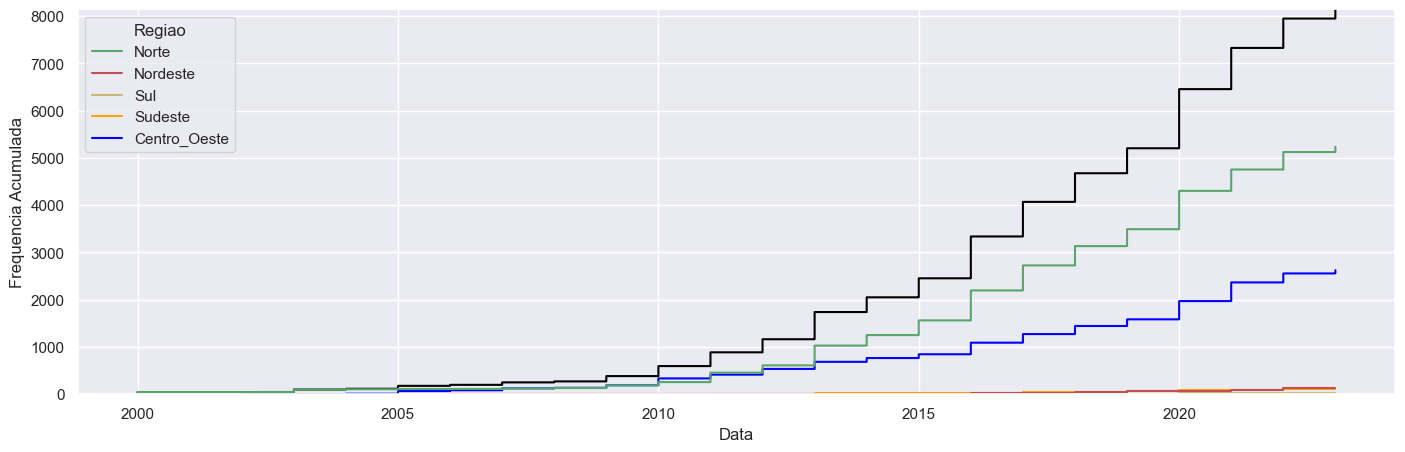

354.1304347826087

In [4]:
import seaborn as sns
import  matplotlib.pyplot as plt
%matplotlib inline
palette = {'Norte':'g','Nordeste':'r','Sul':'y','Sudeste':'orange','Centro_Oeste':'blue'}


sns.set(rc={"figure.figsize":(17, 5)})
y=sns.histplot(join_333_regiao.query('Data >= 2000').Data, #Histplot simples
                stat='count', alpha=.4,binwidth=0.5,linewidth=3, edgecolor=".5", facecolor=(0, 0, 0, 0)) # Serve para ver a distribuição geral da quantidade de pedidos por ano

for c in y.containers:
    
    # customize the label to account for cases when there might not be a bar section
    labels = [f'{h:0.1f}' if (h := v.get_height())  else '' for v in c ]
    
    # set the bar label
    y.bar_label(c, labels=labels, fontsize=8, padding=3)





y.set(xlabel='Data', ylabel='Contagem de pedidos')
#Plotando uma Linha Paralela que indica a Média ao longo dos 20 anos de numero de pedidos:
y.axhline(join_333_regiao.query('Data >= 2000')['Data'].value_counts().mean(),color ='r')
plt.show()

#f = sns.ecdfplot(eventos333_ativos_ouro['Data'], stat='proportion')#Plotando um grafico de frequencia relativa acumulativa
#Com este plot, podemos perceber quantos pedidos para cada ano influenciam a frequencia acumulada
#f.set(xlabel='Data', ylabel='Frequencia Relativa Acumulada')
#plt.show()

#Plotando quebrando por regiao
#Assim conseguimos saber quais regiões do Brasil possuem os maiores pedidos
#w = sns.histplot(data=join_333_regiao, x="Data", hue="Regiao", stat='count', alpha=.4, multiple='dodge',palette='Set2',
             #binwidth=1)
#w.set(xlabel='Data', ylabel='Contagem de pedidos')
#plt.show()

sns.ecdfplot(data=join_333_regiao.query('Data >= 2000'), x="Data", stat='count',color='black')
h = sns.ecdfplot(data=join_333_regiao.query('Data >= 2000'), x="Data", hue="Regiao", stat='count',palette=palette)

h.set(xlabel='Data', ylabel='Frequencia Acumulada')

plt.show()
join_333_regiao.query('Data >= 2000')['Data'].value_counts().mean()

In [ ]:
#Salvando Figura 3:

full_cumulative = join_333_regiao.query('Data >= 2000').groupby(['Data'],as_index=False).Data.value_counts()
full_cumulative['cumulativeSum'] = full_cumulative['count'].cumsum()
full_cumulative['Grupo']='Total'


cumulative_norte = join_333_regiao.query('Data >= 2000').query('Regiao=="Norte"').groupby(['Data'],as_index=False).Data.value_counts()
cumulative_norte['cumulativeSum']= cumulative_norte['count'].cumsum()
cumulative_norte['Grupo']='Norte'

cumulative_nordeste = join_333_regiao.query('Data >= 2000').query('Regiao=="Nordeste"').groupby(['Data'],as_index=False).Data.value_counts()
cumulative_nordeste['cumulativeSum']= cumulative_nordeste['count'].cumsum()
cumulative_nordeste['Grupo']='Nordeste'

cumulative_Sul = join_333_regiao.query('Data >= 2000').query('Regiao=="Sul"').groupby(['Data'],as_index=False).Data.value_counts()
cumulative_Sul['cumulativeSum']= cumulative_Sul['count'].cumsum()
cumulative_Sul['Grupo']='Sul'

cumulative_Sudeste = join_333_regiao.query('Data >= 2000').query('Regiao=="Sudeste"').groupby(['Data'],as_index=False).Data.value_counts()
cumulative_Sudeste['cumulativeSum']= cumulative_Sudeste['count'].cumsum()
cumulative_Sudeste['Grupo']='Sudeste'

cumulative_CentroOeste = join_333_regiao.query('Data >= 2000').query('Regiao=="Centro_Oeste"').groupby(['Data'],as_index=False).Data.value_counts()
cumulative_CentroOeste['cumulativeSum']= cumulative_CentroOeste['count'].cumsum()
cumulative_CentroOeste['Grupo']='Centro Oeste'

figura_3 = pd.concat([full_cumulative,cumulative_norte,cumulative_nordeste,cumulative_Sul,cumulative_Sudeste,cumulative_CentroOeste])
figura_3.to_csv('Figura3.csv')


In [ ]:
#Salvando df figura 5
join_333_regiao.query('Data >= 2000').groupby('Data',as_index=False).Data.value_counts().to_csv('Figura5.csv')

## QUEBRANDO POR REGIAO Norte e Centro Oeste para o Evento 333

In [ ]:
import seaborn as sns
import  matplotlib.pyplot as plt
%matplotlib inline
sns.set(rc={"figure.figsize":(17, 5)})
#Fazendo um Histograma para Regiao Norte
paletteN = {'PA':'g','AM':'r','RR':'y','RO':'orange','AP':'blue','TO':'magenta'}
paletteCO = {'MT':'blue','GO':'green','MS':'black'}
y = sns.histplot(data=join_333_regiao.query('Data >= 2000').query('Regiao=="Norte"'), x="Data", hue="UF", stat='count', alpha=1, multiple='dodge',bins=25,palette=paletteN)

y.set(xlabel='Data', ylabel='Contagem de pedidos')
plt.show()

#Fazendo um histograma para Regiao Centro Oeste
w = sns.histplot(data=join_333_regiao.query('Data >= 2000').query('Regiao=="Centro_Oeste"'), x="Data", hue="UF", stat='count', alpha=1, multiple='dodge',bins=25,palette=paletteCO)
w.set(xlabel='Data', ylabel='Contagem de pedidos')
plt.show()



In [ ]:
#Df para figura 6
join_333_regiao.query('Data >= 2000').query('Regiao=="Norte"').groupby(['Data','UF'],as_index=False).Data.value_counts().to_csv('Figura6.csv')

In [ ]:
#Df para figura 7
join_333_regiao.query('Data >= 2000').query('Regiao=="Centro_Oeste"').groupby(['Data','UF'],as_index=False).Data.value_counts().to_csv('Figura7.csv')

In [ ]:
#join_333_regiao.query('Data >= 20a00').query('Regiao=="Norte"').Data.value_counts().sum()
join_333_regiao.query('Data >= 2000').query('UF=="PA"').groupby('UF')['Data'].count()

## Criando Análises para ver quantos processos foram pedidos para Evento 513

In [ ]:
#Criando analises para evento 333
#Pegando para ouro
ouro = substancia.query('Substancia.str.contains("OURO")',engine = 'python')
#Pegando eventos 513
eventos513 = eventos.query('IDEvento == 513')
#Filtrando os processos ativos:
prceossos_ativos = processos.query('BTAtivo=="S"')
#Relacionando os processos ativos com o df 513
eventos513_ativos = eventos513[eventos513['DSProcesso'].isin(prceossos_ativos['DSProcesso'])]
#Relacionando Ouro com os processos de evento 513
eventos513_ativos_ouro = eventos513_ativos[eventos513_ativos['DSProcesso'].isin(ouro['DSProcesso'])]
#Transformando o campo de data do evento513 em datetime
eventos513_ativos_ouro['Data'] = pd.to_datetime(eventos513_ativos_ouro.DTEvento).dt.year
#Tirando registros duplicados
eventos513_ativos_ouro.drop_duplicates(subset='DSProcesso' ,keep ='last',inplace=True)


#Pegando os estados para esses processo ativos de ouro
mun_ouro_ativo_513 = mun[mun['DSProcesso'].isin(eventos513_ativos_ouro['DSProcesso'])]
#Agrupando os estados por Regiao (Norte, sul, Sudeste,CentroOeste, Nordeste)
sul =['RS','SC','PR']
sudeste = ['SP','MG','RJ','ES']
centrooeste =['MS','MT','GO','DF']
nordeste = ['BA','PI','MA','CE','RN','PB','PE','AL','SE']
norte = ['AC','RO','AM','RR','PA','TO','AP']
mun_ouro_ativo_513['Regiao'] = ['Sul' if x in sul else 'Sudeste' if x in sudeste else 'Centro_Oeste' if x in centrooeste else 'Nordeste' if x in nordeste else 'Norte' if x in norte else 'SemEstado' for x in mun_ouro_ativo_513['UF']]
#Dando Join com o df eventos333_ativos_ouro para plotar o ano com regiao do brasil
join_513_regiao = eventos513_ativos_ouro.merge(mun_ouro_ativo_513,on='DSProcesso',how='inner')
join_513_regiao.drop_duplicates(subset='DSProcesso' ,keep ='last',inplace=True)
full_join = join_513_regiao.merge(join_333_regiao,how='inner',on='DSProcesso')
full_join.query('Data_x >=2000')
#Temos agora o dataframe eventos513_ativos_ouro que contem informaçoes para os processos de ouro, com evento 513
#E tambem temos esse mesmo dataframe mas separado por UF e regiões do BRasil
full_join_2 = full_join.merge(processos[['QTAreaHA','DSProcesso']],on='DSProcesso',how='inner')

## Fazendo Plot desses dois dataframes (evento 513)

In [ ]:
import seaborn as sns
import  matplotlib.pyplot as plt
%matplotlib inline
sns.set(rc={"figure.figsize":(17, 5)})
palette = {'Norte':'g','Nordeste':'r','Sul':'y','Sudeste':'orange','Centro_Oeste':'blue'}
y=sns.histplot(full_join.query('Data_x >=2000')['Data_x'], #Histplot simples
                stat='count', alpha=.4,binwidth=0.5,linewidth=3, edgecolor=".5", facecolor=(0, 0, 0, 0)) # Serve para ver a distribuição geral da quantidade de pedidos por ano
for c in y.containers:
    
    # customize the label to account for cases when there might not be a bar section
    labels = [f'{h:0.1f}' if (h := v.get_height())  else '' for v in c ]
    
    # set the bar label
    y.bar_label(c, labels=labels, fontsize=8, padding=3)
y.set(xlabel='Data', ylabel='Contagem de pedidos')
#Plotando uma Linha Paralela que indica a Média ao longo dos 20 anos de numero de pedidos:

plt.show()

sns.ecdfplot(data=full_join.query('Data_x >=2000'), x="Data_x", stat='count',color='black')
h = sns.ecdfplot(data=full_join.query('Data_x >=2000'), x="Data_x", hue="Regiao_x", stat='count',palette=palette)

h.set(xlabel='Data', ylabel='Frequencia Acumulada')

plt.show()


In [ ]:
#Criando df para figura 4:


full_cumulative = full_join.query('Data_x >=2000').groupby(['Data_x'],as_index=False).Data_x.value_counts()
full_cumulative['cumulativeSum'] = full_cumulative['count'].cumsum()
full_cumulative['Grupo']='Total'


cumulative_norte = full_join.query('Data_x >=2000').query('Regiao_x=="Norte"').groupby(['Data_x'],as_index=False).Data_x.value_counts()
cumulative_norte['cumulativeSum']= cumulative_norte['count'].cumsum()
cumulative_norte['Grupo']='Norte'

cumulative_nordeste = full_join.query('Data_x >=2000').query('Regiao_x=="Nordeste"').groupby(['Data_x'],as_index=False).Data_x.value_counts()
cumulative_nordeste['cumulativeSum']= cumulative_nordeste['count'].cumsum()
cumulative_nordeste['Grupo']='Nordeste'

cumulative_Sul = full_join.query('Data_x >=2000').query('Regiao_x=="Sul"').groupby(['Data_x'],as_index=False).Data_x.value_counts()
cumulative_Sul['cumulativeSum']= cumulative_Sul['count'].cumsum()
cumulative_Sul['Grupo']='Sul'

cumulative_Sudeste = full_join.query('Data_x >=2000').query('Regiao_x=="Sudeste"').groupby(['Data_x'],as_index=False).Data_x.value_counts()
cumulative_Sudeste['cumulativeSum']= cumulative_Sudeste['count'].cumsum()
cumulative_Sudeste['Grupo']='Sudeste'

cumulative_CentroOeste = full_join.query('Data_x >=2000').query('Regiao_x=="Centro_Oeste"').groupby(['Data_x'],as_index=False).Data_x.value_counts()
cumulative_CentroOeste['cumulativeSum']= cumulative_CentroOeste['count'].cumsum()
cumulative_CentroOeste['Grupo']='Centro Oeste'

figura_4 = pd.concat([full_cumulative,cumulative_norte,cumulative_nordeste,cumulative_Sul,cumulative_Sudeste,cumulative_CentroOeste])
figura_4.to_csv('Figura4.csv')

In [ ]:
#DF para figura 11
full_join.query('Data_x >=2000').groupby('Data_x',as_index=False).Data_x.value_counts().to_csv('Figura11.csv')

## Quebrando Para Regiao Norte e Centro Oeste para evento 513

In [ ]:
import seaborn as sns
import  matplotlib.pyplot as plt
%matplotlib inline
sns.set(rc={"figure.figsize":(17, 5)})
#Fazendo um Histograma para Regiao Norte
paletteN = {'PA':'g','AM':'r','RR':'y','RO':'orange','AP':'blue','TO':'magenta'}
paletteCO = {'MT':'blue','GO':'green','MS':'black'}
y = sns.histplot(data=full_join.query('Data_x >= 2007').query('Regiao_x=="Norte"'), x="Data_x", hue="UF_x", stat='count', alpha=1, multiple='dodge',bins=25,palette=paletteN)

y.set(xlabel='Data', ylabel='Contagem de pedidos')
plt.show()

#Fazendo um histograma para Regiao Centro Oeste
w = sns.histplot(data=full_join.query('Data_x >= 2000').query('Regiao_x=="Centro_Oeste"'), x="Data_x", hue="UF_x", stat='count', alpha=1, multiple='dodge',bins=25,palette=paletteCO)
w.set(xlabel='Data', ylabel='Contagem de pedidos')
plt.show()



In [ ]:
#join_333_regiao.query('Data >= 20a00').query('Regiao=="Norte"').Data.value_counts().sum()
full_join_2.query('Data_x >= 2000').query('Regiao_x=="Norte"').groupby(['UF_x'],as_index=False)['Data_x'].count()


In [ ]:
pessoa_fisica = pessoa.query('Pessoa=="F"')
pessoa_juridica = pessoa.query('Pessoa=="J"')
p_fisica_only = pessoa_fisica[~pessoa_fisica['DSProcesso'].isin(pessoa_juridica['DSProcesso'])]
juridico_certo = pessoa[ ~ pessoa['DSProcesso'].isin(p_fisica_only['DSProcesso'])]
#Criando dummys
p_fisica_only['Pessoa_Dummy'] = 'Pessoa Fisica'
juridico_certo['Pessoa_Dummy'] = 'Pessoa Juridica'
p_fisica_only.drop_duplicates('DSProcesso',keep = 'first',inplace=True)
juridico_certo.drop_duplicates('DSProcesso',keep = 'first',inplace=True)
pessoas_certo = pd.concat([p_fisica_only,juridico_certo])
pessoas_certo[['DSProcesso','Pessoa_Dummy','Pessoa_NOME']]

In [ ]:
import seaborn as sns
import numpy as np
import  matplotlib.pyplot as plt
%matplotlib inline
sns.set(rc={"figure.figsize":(17, 5)})
a = pessoas_certo[['DSProcesso','Pessoa_Dummy','Pessoa_NOME']]
b = full_join.query('Data_x >=2000').merge(a,how='inner',on='DSProcesso')
b.drop_duplicates("DSProcesso",keep='last',inplace=True)
b_g = b.groupby(['Pessoa_Dummy'],as_index=False).Data_x.value_counts()
b_g['Decadas'] =np.select(
    [
        
        b_g['Data_x'].between(2000, 2009, inclusive=True),
        b_g['Data_x'].between(2010, 2019, inclusive=True),
        b_g['Data_x'].between(2020, 2023, inclusive=True)
    ],
    [
        
        'Década de 2000 - 2009',
        'Década de 2010 - 2019',
        'Década de 2020- 2023'
    ]
)
b_g_g = b_g.groupby(['Decadas','Pessoa_Dummy'],as_index=False)['count'].sum()
sns.barplot(data=b_g_g, x="Decadas", y="count", hue="Pessoa_Dummy")
plt.show()


In [ ]:
import seaborn as sns
import numpy as np
import  matplotlib.pyplot as plt
%matplotlib inline
sns.set(rc={"figure.figsize":(17, 5)})
a = pessoa[['DSProcesso','Pessoa','Pessoa_NOME']]
b = full_join.merge(a,how='inner',on='DSProcesso')
b.drop_duplicates("DSProcesso",keep='last',inplace=True)

full_join.columns